In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [4]:
data_types = churnData.dtypes

In [6]:
churnData.replace({'TotalCharges': {' ':''}}, inplace=True)
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"])

In [7]:
churnData.dropna(inplace=True)

In [8]:
data_filled = churnData.fillna(0)
churnData.replace({'Churn':{'Yes':1, 'No':0}}, inplace=True)
churnData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   OnlineSecurity    7032 non-null   object 
 7   OnlineBackup      7032 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  Contract          7032 non-null   object 
 13  MonthlyCharges    7032 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7032 non-null   int64  
dtypes: float64(2), int64(3), object(11)
memory

In [9]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
scaler.fit(np.array(X_train))
X_train_scaled = scaler.transform(np.array(X_train))
X_test_scaled = scaler.transform(np.array(X_test))

In [10]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123 

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE) # splitting the data into train and test sets

In [14]:
model = KNeighborsClassifier(n_neighbors=20,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.799644,0.774698
1,Precision,0.708701,0.715596
2,Recall,0.385460,0.379562


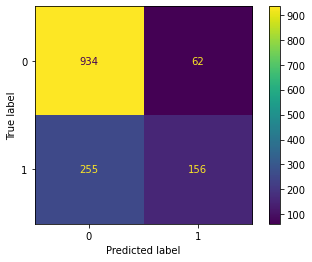

In [15]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [21]:
for i in range (1,10) :
    
    X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
    y = churnData['Churn']
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE)
    model = KNeighborsClassifier(n_neighbors=20,weights='uniform') # declare we're using knn classification model
    model.fit(X_train, y_train) # train model
    y_pred = model.predict(X_test) # predict test
    y_pred_train=model.predict(X_train) # predict train (for sanity checks)

    performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})
    print(i)

     
    display(performance_log)
    


1


,Error_metric,Train,Test
0,Accuracy,0.799644,0.774698
1,Precision,0.708701,0.715596
2,Recall,0.385460,0.379562


2


,Error_metric,Train,Test
0,Accuracy,0.799644,0.774698
1,Precision,0.708701,0.715596
2,Recall,0.385460,0.379562


3


,Error_metric,Train,Test
0,Accuracy,0.799644,0.774698
1,Precision,0.708701,0.715596
2,Recall,0.385460,0.379562


4


,Error_metric,Train,Test
0,Accuracy,0.799644,0.774698
1,Precision,0.708701,0.715596
2,Recall,0.385460,0.379562


5


,Error_metric,Train,Test
0,Accuracy,0.799644,0.774698
1,Precision,0.708701,0.715596
2,Recall,0.385460,0.379562


6


,Error_metric,Train,Test
0,Accuracy,0.799644,0.774698
1,Precision,0.708701,0.715596
2,Recall,0.385460,0.379562


7


,Error_metric,Train,Test
0,Accuracy,0.799644,0.774698
1,Precision,0.708701,0.715596
2,Recall,0.385460,0.379562


8


,Error_metric,Train,Test
0,Accuracy,0.799644,0.774698
1,Precision,0.708701,0.715596
2,Recall,0.385460,0.379562


9


,Error_metric,Train,Test
0,Accuracy,0.799644,0.774698
1,Precision,0.708701,0.715596
2,Recall,0.385460,0.379562
